In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [10]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (r2-score): %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination (r2-score): 0.47


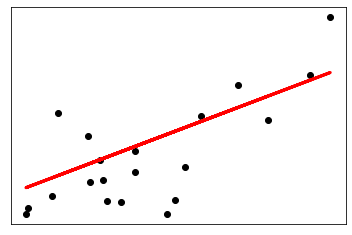

In [11]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 3D Regression

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)
# set dimension of the data
dim = 12
# create random data, which will be the target values
Z = (np.ones((dim,dim)) * np.arange(1,dim+1,1))**3 + np.random.rand(dim,dim) * 200 

# create a 2D-mesh
x = np.arange(1,dim+1).reshape(dim,1)
y = np.arange(1,dim+1).reshape(1,dim)
X,Y = np.meshgrid(x,y)

# calculate polynomial features based on the input mesh
features = {}
features['x^0*y^0'] = np.matmul(x**0,y**0).flatten()
features['x*y'] = np.matmul(x,y).flatten()
features['x*y^2'] = np.matmul(x,y**2).flatten()
features['x^2*y^0'] = np.matmul(x**2, y**0).flatten()
features['x^2*y'] = np.matmul(x**2, y).flatten()
features['x^3*y^2'] = np.matmul(x**3, y**2).flatten()
features['x^3*y'] = np.matmul(x**3, y).flatten()
features['x^0*y^3'] = np.matmul(x**0, y**3).flatten()
dataset = pd.DataFrame(features)


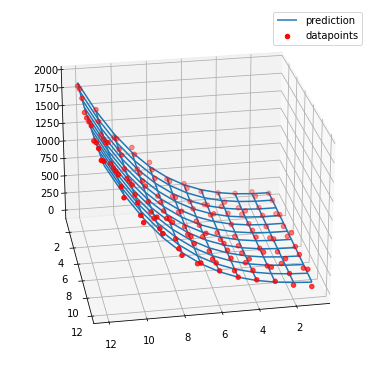

In [13]:
# fit a linear regression model
reg = LinearRegression().fit(dataset.values, Z.flatten())
# get coefficients and calculate the predictions 
z_pred = reg.intercept_ + np.matmul(dataset.values, reg.coef_.reshape(-1,1)).reshape(dim,dim)

# visualize the results
fig = plt.figure(figsize = (5,5))
ax = Axes3D(fig)
# plot the fitted curve
ax.plot_wireframe(X, Y, z_pred, label = 'prediction')
# plot the target values
ax.scatter(X, Y, Z, c = 'r', label = 'datapoints')
ax.view_init(25, 80)
plt.legend()